# Purposes of this document

the reason I am doing this is that I want to make this really easy kind of thing.  

# ideas

In [1]:

random_seeds = [0, 100, 1000]
num_rep = len(random_seeds)

apply leo's idea, we are gonna be suspicious everything, right. 

In [2]:
import numpy as np

percent_high_SNR_noises = np.array([0.6])

num_noises = len(percent_high_SNR_noises)


percent_high_SNR_noises_labels = [f'{s:.2f}' for s in percent_high_SNR_noises]

print(percent_high_SNR_noises_labels)
print(num_noises)

['0.60']
1


In [3]:
#the second idea is actually to prune the feature set
batch_to_prune = 50

# Experimental setup related to the questions

this part should be configured to directly test the hypothesis put forward in the previous section


In [4]:
mean_firing_rate_low = 50
mean_firing_rate_high = 200

In [5]:

np.set_printoptions(precision=2, suppress=True)

noise_mode = 'fixed_gaussian'
fixed_noise_level = 5#Hz

n_neurons = 32

n_neurons_per_group = 8

high_noise_neuron_ind = np.arange(n_neurons_per_group)
medium_noise_neuron_ind = np.arange(n_neurons_per_group, 2 * n_neurons_per_group)
low_noise_neuron_ind = np.arange(2*n_neurons_per_group, 3 * n_neurons_per_group)
no_noise_neuron_ind = np.arange(3 * n_neurons_per_group, 4* n_neurons_per_group)

neuron_type_indices_in_a_list = [
    high_noise_neuron_ind,
    medium_noise_neuron_ind,
    low_noise_neuron_ind,
    no_noise_neuron_ind
]

N_TYPES_OF_NEURONS = len(neuron_type_indices_in_a_list)


no_noise_neuron_list = np.full(n_neurons, False, dtype = bool)
low_noise_neuron_list = np.full(n_neurons, False, dtype = bool)
medium_noise_neuron_list = np.full(n_neurons, False, dtype = bool)
high_noise_neuron_list = np.full(n_neurons, False, dtype = bool)

with_noise_neuron_list = np.full(n_neurons, False, dtype = bool)



no_noise_neuron_list[no_noise_neuron_ind] = True
low_noise_neuron_list[low_noise_neuron_ind] = True
medium_noise_neuron_list[medium_noise_neuron_ind] = True
high_noise_neuron_list[high_noise_neuron_ind] = True

with_noise_neuron_list[low_noise_neuron_ind] = True
with_noise_neuron_list[medium_noise_neuron_ind] = True
with_noise_neuron_list[high_noise_neuron_ind] = True

neuron_type_bool_list = [
    high_noise_neuron_list,
    medium_noise_neuron_list,
    low_noise_neuron_list,
    no_noise_neuron_list,
]

print(neuron_type_bool_list)


percent_of_count = np.ones(n_neurons)[:, np.newaxis]

print(f'set up the variances in a list:')

percent_of_count[high_noise_neuron_ind] = 1 
percent_of_count[medium_noise_neuron_ind] = 1
percent_of_count[low_noise_neuron_ind] = 1
percent_of_count[no_noise_neuron_ind] = 0.8

print(f'we therefore know the number of neurons to be {n_neurons}')
print(percent_of_count)

[array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False]), array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False]), array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False]), array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,

In [6]:
# make percent of count into a list 
percent_of_count_in_a_list = list()

for i in range(num_noises):
    percent_of_count = np.ones(n_neurons)[:, np.newaxis]


    percent_of_count[high_noise_neuron_ind] =  1
    percent_of_count[medium_noise_neuron_ind] = 1
    percent_of_count[low_noise_neuron_ind] = 1
    percent_of_count[no_noise_neuron_ind] = percent_high_SNR_noises[i]
    
    percent_of_count_in_a_list.append(percent_of_count)


In [7]:

#for comparision
#for comparision

exp_conds = [f'w/o FS {s}' for s in percent_high_SNR_noises]

print(f'we have experimental conditions {exp_conds}')

#setting clda parameters 
##learner: collects paird data at batch_sizes
RHO = 0.5
batch_size = 100


#assistor set up assist level
assist_level = (0.0, 0.0)

#learner and updater: actualy set up rho
UPDATER_BATCH_TIME = 1
UPDATER_HALF_LIFE = np.log(RHO)  * UPDATER_BATCH_TIME / np.log(0.5)


we have experimental conditions ['w/o FS 0.6']


In [8]:
# CHANGE: game mechanics: generate task params
N_TARGETS = 8
N_TRIALS = 800

NUM_EXP_COND = len(exp_conds) # how many experiments we are running. 
NUM_EXP = NUM_EXP_COND * num_rep

# Config the experiments

this section largely copyied and pasted from   
bmi3d-sijia(branch)-bulti_in_experiemnts
https://github.com/sijia66/brain-python-interface/blob/master/built_in_tasks/sim_task_KF.py

## load dependant libraries

In [9]:
from afs_plotting import *

In [10]:
# import libraries
# make sure these directories are in the python path., 
from bmimultitasks import SimBMIControlMulti, SimBMICosEncKFDec, BMIControlMultiNoWindow
from features import SaveHDF
from features.simulation_features import get_enc_setup, SimKFDecoderRandom,SimIntentionLQRController, SimClockTick
from features.simulation_features import SimHDF, SimTime

from riglib import experiment

from riglib.stereo_opengl.window import FakeWindow
from riglib.bmi import train


from behaviour_metrics import filter_state, sort_trials

from weights import calc_p_values_for_spike_batches_use_intended_kin
from weights import calc_single_batch_p_values_by_fitting_kinematics_to_spike_counts
import weights

import time
import copy
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import itertools #for identical sequences

np.set_printoptions(precision=2, suppress=True)


/home/sijia-aw/BMi3D_my/lab_bmi3d/riglib/blackrock/cerelink.py:13: UserWarning: Unable to import cerebus library. Check if is installed if using the Blackrock NeuroPort system
  warnings.warn("Unable to import cerebus library. Check if is installed if using the Blackrock NeuroPort system")


##  behaviour and task setup

In [11]:
seq = SimBMIControlMulti.sim_target_seq_generator_multi(
N_TARGETS, N_TRIALS)

#create a second version of the tasks
seqs = itertools.tee(seq, NUM_EXP + 1)
target_seq = list(seqs[NUM_EXP])

seqs = seqs[:NUM_EXP]


SAVE_HDF = False
SAVE_SIM_HDF = True #this makes the task data available as exp.task_data_hist
DEBUG_FEATURE = False


#base_class = SimBMIControlMulti
base_class = BMIControlMultiNoWindow

#for adding experimental features such as encoder, decoder
feats = []


goin

In [12]:
from simulation_features import TimeCountDown

feats.append(TimeCountDown)

total_exp_time = 600# in seconds

## encoder

the cosine tuned encoder uses a poisson process, right
https://en.wikipedia.org/wiki/Poisson_distribution
so if the lambda is 1, then it's very likely 

In [13]:
from features.simulation_features import get_enc_setup

ENCODER_TYPE = 'cosine_tuned_encoder_with_poisson_noise'

#neuron set up : 'std (20 neurons)' or 'toy (4 neurons)' 
N_NEURONS, N_STATES, sim_C = get_enc_setup(sim_mode = 'rot_90', n_neurons= n_neurons)


print(no_noise_neuron_list)
#multiply our the neurons
sim_C[with_noise_neuron_list] =  sim_C[with_noise_neuron_list]  * mean_firing_rate_low
sim_C[no_noise_neuron_list]  = sim_C[no_noise_neuron_list] * mean_firing_rate_high


print(sim_C.shape)

#set up intention feedbackcontroller
#this ideally set before the encoder
feats.append(SimIntentionLQRController)

#set up the encoder
from features.simulation_features import SimCosineTunedEncWithNoise
feats.append(SimCosineTunedEncWithNoise)


#feats_2.append(SimIntentionLQRController)
#feats_2.append(SimCosineTunedEncWithNoise)

features.simulation_features: get_enc_setup has a tuning_level of 1 

[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True]
(32, 7)


## decoder setup

In [14]:
#clda on random 
DECODER_MODE = 'random' # random 

   #take care the decoder setup
if DECODER_MODE == 'random':
    feats.append(SimKFDecoderRandom)
    #feats_2.append(SimKFDecoderRandom)
    print(f'{__name__}: set base class ')
    print(f'{__name__}: selected SimKFDecoderRandom \n')
else: #defaul to a cosEnc and a pre-traind KF DEC
    from features.simulation_features import SimKFDecoderSup
    feats.append(SimKFDecoderSup)
    #feats_2.append(SimKFDecoderRandom)
    print(f'{__name__}: set decoder to SimKFDecoderSup\n')

__main__: set base class 
__main__: selected SimKFDecoderRandom 



##  clda: learner and updater

In [15]:


LEARNER_TYPE = 'feedback' # to dumb or not dumb it is a question 'feedback'
UPDATER_TYPE = 'smooth_batch' #none or "smooth_batch"


#you know what? 
#learner only collects firing rates labeled with estimated estimates
#we would also need to use the labeled data
#now, we can set up a dumb/or not-dumb learner
if LEARNER_TYPE == 'feedback':
    from features.simulation_features import SimFeedbackLearner
    feats.append(SimFeedbackLearner)
    #feats_2.append(SimFeedbackLearner)
else:
    from features.simulation_features import SimDumbLearner
    feats.append(SimDumbLearner)
    #feats_2.append(SimDumbLearner)

#to update the decoder.
if UPDATER_TYPE == 'smooth_batch':
    from features.simulation_features import SimSmoothBatch
    feats.append(SimSmoothBatch)
    #feats_2.append(SimSmoothBatch)
else: #defaut to none 
    print(f'{__name__}: need to specify an updater')
    



## feature selector setup

In [16]:
from feature_selection_feature import FeatureTransformer, TransformerBatchToFit
from feature_selection_feature import FeatureSelector, LassoFeatureSelector, SNRFeatureSelector, IterativeFeatureSelector
from feature_selection_feature import IterativeFeatureRemoval

#pass the real time limit on clock
feats.append(FeatureSelector)
#feats_2.append(IterativeFeatureRemoval)


feature_x_meth_arg = [
    ('transpose', None ),
]

kwargs_feature = dict()
kwargs_feature = {
    'transform_x_flag':True,
    'transform_y_flag':True,
    'feature_x_transformer':FeatureTransformer(feature_x_meth_arg),
    'feature_y_transformer':TransformerBatchToFit(),
    'n_starting_feats': n_neurons,
    'n_states':  7
}

print('kwargs will be updated in a later time')
print(f'the feature adaptation project is tracking {kwargs_feature.keys()} ')

kwargs will be updated in a later time
the feature adaptation project is tracking dict_keys(['transform_x_flag', 'transform_y_flag', 'feature_x_transformer', 'feature_y_transformer', 'n_starting_feats', 'n_states']) 


## assistor setup

## (Check) config the experiment

In [17]:
exp_feats = [feats] * num_noises


In [18]:
if DEBUG_FEATURE: 
    from features.simulation_features import DebugFeature
    feats.append(DebugFeature)
    
if SAVE_HDF: 
    feats.append(SaveHDF)
    #feats_2.append(SaveHDF)
if SAVE_SIM_HDF: 
    feats.append(SimHDF)
    #feats_2.append(SimHDF)
    
    
#pass the real time limit on clock
feats.append(SimClockTick)
feats.append(SimTime)



In [19]:


kwargs_exps = list()

for i in range(num_noises):
    d = dict()
    
    d['total_exp_time'] = total_exp_time
    
    d['assist_level'] = assist_level
    d['sim_C'] = sim_C
    
    d['noise_mode'] = noise_mode
    d['percent_noise'] = percent_of_count_in_a_list[i]
    d['fixed_noise_level'] = fixed_noise_level
    
    d['batch_size'] = batch_size
    
    d['batch_time'] = UPDATER_BATCH_TIME
    d['half_life'] = UPDATER_HALF_LIFE
    
    
    d.update(kwargs_feature)
    
    kwargs_exps.append(d)



print(f'we have got {len(kwargs_exps)} exps')

we have got 1 exps


## make and initalize experiment instances

In [20]:

exps_reps = list()


for i,s in enumerate(seqs):
    
    #spawn the task
    kwargs_exps_index = i % NUM_EXP_COND
    f = exp_feats[kwargs_exps_index]
    Exp = experiment.make(base_class, feats=f)

    e = Exp(s, **kwargs_exps[kwargs_exps_index])

    exps_reps.append(e)

exps_np  = np.array(exps_reps, dtype = 'object')



#run the ini
for e in exps_np: 
    e.init()
    print('next')
    print()
    

metaclass constructor
(<class 'simulation_features.TimeCountDown'>, <class 'features.simulation_features.SimIntentionLQRController'>, <class 'features.simulation_features.SimCosineTunedEncWithNoise'>, <class 'features.simulation_features.SimKFDecoderRandom'>, <class 'features.simulation_features.SimFeedbackLearner'>, <class 'features.simulation_features.SimSmoothBatch'>, <class 'feature_selection_feature.FeatureSelector'>, <class 'features.simulation_features.SimHDF'>, <class 'features.simulation_features.SimClockTick'>, <class 'features.simulation_features.SimTime'>, <class 'bmimultitasks.BMIControlMultiNoWindow'>)
[<class 'simulation_features.TimeCountDown'>, <class 'features.simulation_features.SimIntentionLQRController'>, <class 'features.simulation_features.SimCosineTunedEncWithNoise'>, <class 'features.simulation_features.SimKFDecoderRandom'>, <class 'features.simulation_features.SimFeedbackLearner'>, <class 'features.simulation_features.SimSmoothBatch'>, <class 'feature_selectio

In [21]:
exps_rnd = np.reshape(exps_np, (num_rep,-1))

exps_rnd.shape

print(NUM_EXP)

3


# Pre-experiment check: check the Kalman filter before training

we replace the encoder using the weights
assume, they are all randomly initialized get the first decoder
get a handle to the first decoder

select_decoder_features: _change_one_flag = False
(32, 7)
(32, 7)
active feature set is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
after trans: (32, 7)
after trans: (32, 32)
decoder change flag to false
select_decoder_features: _change_one_flag = False
(32, 7)
(32, 7)
active feature set is [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
after trans: (32, 7)
after trans: (32, 32)
decoder change flag to false
select_decoder_features: _change_one_flag = False
(32, 7)
(32, 7)
active feature set is [ True  True  True  True  True  True  True  True  True  True

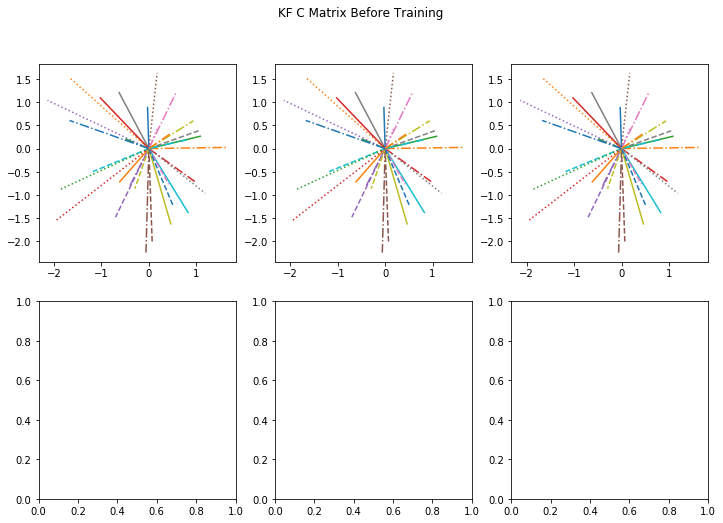

In [22]:
from afs_plotting import plot_prefered_directions

print('we replace the encoder using the weights')
print('assume, they are all randomly initialized get the first decoder')
print('get a handle to the first decoder')
first_decoder = exps_np[0].decoder
target_C = first_decoder.filt.C
target_Q = np.copy(first_decoder.filt.Q)

print()
diag_val = 10000
np.fill_diagonal(target_Q, diag_val)

#replace the decoder
for i,e in enumerate(exps_np):
    weights.change_target_kalman_filter_with_a_C_mat(e.decoder.filt, target_C, 
                                                     Q= target_Q, debug=False)
    e.select_decoder_features(e.decoder)
    e.record_feature_active_set(e.decoder)
    
print('we check the new decoder C matrix:')

figure_decoder_C, axs_decoder_C = plt.subplots(nrows=2, 
                               ncols=NUM_EXP, figsize = [GLOBAL_FIGURE_VERTICAL_SIZE * NUM_EXP, GLOBAL_FIGURE_VERTICAL_SIZE * 2],squeeze = False)
figure_decoder_C.suptitle('KF C Matrix Before Training ')

for i,e in enumerate(exps_np):
    C = e.decoder.filt.C
    plot_prefered_directions(C, ax = axs_decoder_C[0,i])
    #axs_decoder_C[0,i].set_title(exp_conds[i])

# Experiment run: assemble into a complete loop

## actually running the experiments

In [23]:
from feature_selection_feature import run_exp_loop
seed_index = -1

for i,e in enumerate(exps_np):
    
    
    
    kwargs_exps_index = i % NUM_EXP_COND
    
    if kwargs_exps_index == 0: seed_index += 1
    
    #reset the seed.
    np.random.seed(random_seeds[seed_index])
    
    
    try:
        run_exp_loop(e, **kwargs_exps[kwargs_exps_index])
        
    except Exception as e:
        print(e)
        print(f'had problem running exp {i}')
        
    print(f'Finished running  {exp_conds[kwargs_exps_index]}')
    print(i)
    print(f'using random seed {random_seeds[seed_index]}')
    print()

runseq
finished: 1
assist_level at final value after 0 successful trials


/home/sijia-aw/BMi3D_my/lab_bmi3d/riglib/bmi/kfdecoder.py:372: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C = np.mat(np.linalg.lstsq(X.T, Y.T)[0].T)


exit
end of FSM.run, task state is None
Finished running  w/o FS 0.6
0
using random seed 0

runseq
finished: 1
exit
end of FSM.run, task state is None
Finished running  w/o FS 0.6
1
using random seed 100

runseq
finished: 1
exit
end of FSM.run, task state is None
Finished running  w/o FS 0.6
2
using random seed 1000



In [24]:
random_seeds

[0, 100, 1000]

at this moment, 
the seed does not change the trajectory. 
the simulations with three different seeds 
my assumption is that 
1. the random seed will be used to generate encoded features. 
2. but they are the same.

what do I care about 
1. want to have differnt decoder initialization? 
2. on a related note, the stuff I care about 
3. ultimately, we need to simplify to one experiment

# Postprocessing the data for loading

In [25]:
import seaborn as sns
sns.set_context('talk')

In [26]:
exps_np_reshape = np.reshape(exps_np, (num_rep, -1))

exps_np_reshape[0] == exps_np_reshape[1]

array([False])

[128 135 142]


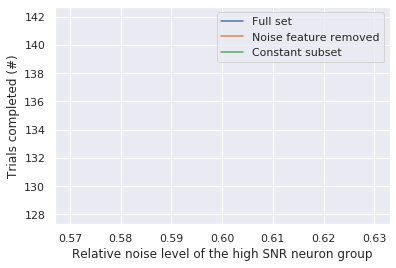

In [27]:
num_rewards = [e.calc_state_occurrences('reward') for e in  exps_np]

num_rewards = np.array(num_rewards)
print(num_rewards)

num_rewards = num_rewards.reshape((3, num_noises)).T

sns.set()



plt.plot(percent_high_SNR_noises, num_rewards)
plt.xlabel('Relative noise level of the high SNR neuron group')
plt.ylabel('Trials completed (#)')
plt.legend(['Full set', 'Noise feature removed', 'Constant subset'])

In [ ]:
num_rewards = [e.calc_state_occurrences('reward') for e in  exps]

num_rewards = np.array(num_rewards)

num_rewards = num_rewards.reshape((3, num_noises)).T

sns.set_context('talk')



plt.plot(percent_high_SNR_noises, num_rewards[:,:2])
plt.xlabel('Relative noise level of the high SNR neuron group')
plt.ylabel('NUmber of rewards')
plt.legend(['Full set', 'Noise feature removed'])
plt.title(r'Increasing noise $\to$ fewer rewards')

In [ ]:
num_rewards_full_set = num_rewards[:, 0][:,np.newaxis]
print(num_rewards_full_set.shape)


num_rewards_norm = num_rewards - np.repeat(num_rewards_full_set, 3, axis = 1)

plt.plot(percent_high_SNR_noises, num_rewards_norm)
plt.xlabel('Relative noise level of the high SNR neuron group')
plt.ylabel('Trials completed (#)')
plt.legend(['Full set', 'Noise feature removed', 'Constant subset'])

In [ ]:
num_rewards_full_set = num_rewards[:, 0][:,np.newaxis]
print(num_rewards_full_set.shape)

sns.set_context('talk')
num_rewards_norm = num_rewards - np.repeat(num_rewards_full_set, 3, axis = 1)

plt.plot(percent_high_SNR_noises, num_rewards_norm[:,:2])
plt.xlabel('Relative noise level of the high SNR neuron group')
plt.ylabel('Rel. number of rewards')
plt.legend(['Full set', 'Noisy feature removed'])
plt.title(r'Increasing noise favors noisy feature removal')

In [ ]:
num_rewards

## declare defs and conventions

In [ ]:
FRAME_RATE = 60
INT_WINDOW_TIME = 10 # s for looking at sample raw data

# some conventions as we go down the loop
X_VEL_STATE_IND = 3
Y_VEL_STATE_IND = 5
X_POS_STATE_IND = 0
Y_POS_STATE_IND = 2

state_indices = [X_POS_STATE_IND,
                 Y_POS_STATE_IND,
                 X_VEL_STATE_IND,
                 Y_VEL_STATE_IND]
state_names = ['x pos ', 'y pos', 'x vel', 'y vel']


INT_WIN_SAMPLES = INT_WINDOW_TIME * FRAME_RATE



## Refactor out the data

In [ ]:
task_data_hist_np_all = [np.array(e.task_data_hist) for e in exps]
len(task_data_hist_np_all)
task_data_hist_np_all[0].dtype

## Finished time in seconds

In [ ]:
finished_times_in_seconds = [int(len(s)/FRAME_RATE) for s in task_data_hist_np_all]
finished_times_in_seconds

# Post data analysis

## Overall  trial statistics succuss rate)

In [ ]:
total_exp_time

In [ ]:
1200 * 60

In [ ]:
state_log = exps[1].state_log 
state_log[-1][1] * 60

In [ ]:
import behaviour_metrics
import importlib
import matplotlib.colors as cm
import matplotlib as mpl

importlib.reload(behaviour_metrics)

window_length = 60 #s


reward_events_per_minute = [behaviour_metrics.calc_event_rate_from_state_log(e.state_log,'reward', 
                                                                             total_time = total_exp_time,
                                                                             window_length = window_length) for e in exps]
reward_events_per_minute = np.array(reward_events_per_minute) * 60 / window_length


import afs_plotting
importlib.reload(afs_plotting)
from afs_plotting import get_cmap


time_vec = np.arange(reward_events_per_minute.shape[1]) * window_length / 60

print(reward_events_per_minute.shape)

cmap = get_cmap(num_noises)
cmap_2 = get_cmap(num_noises, color = mpl.cm.Oranges)
cmap_3 = get_cmap(num_noises, color = mpl.cm.Reds)


for i in range(num_noises):
    plt.plot(time_vec, reward_events_per_minute[i].T,color = cmap.to_rgba(i + 1))
    plt.plot(time_vec, reward_events_per_minute[i +  num_noises].T,color = cmap_2.to_rgba(i + 1))
    plt.plot(time_vec, reward_events_per_minute[i +  num_noises * 2].T,color = cmap_3.to_rgba(i + 1))
    
plt.ylabel('# of rewards per minute')
plt.title('Reward Rate')
plt.xlabel('Time (s)')



In [ ]:
i = 1

plt.plot(time_vec, reward_events_per_minute[i].T)
plt.plot(time_vec, reward_events_per_minute[i +  num_noises].T)
plt.plot(time_vec, reward_events_per_minute[i +  num_noises * 2].T)

plt.ylabel('# of rewards per minute')
plt.title('Reward Rate')
plt.xlabel('Time (min)')
plt.legend(['Full set', 'Noise feature removed', 'Constant subset'])

In [ ]:
i = 1

plt.plot(time_vec, reward_events_per_minute[i].T)
plt.plot(time_vec, reward_events_per_minute[i +  num_noises].T)

plt.ylabel('# of rewards per minute')
plt.title('More rewarded trials after noisy features removed')
plt.xlabel('Time (min)')
plt.legend(['Full set', 'Noise feature removed'])

In [ ]:
i = 2

reward_events_per_minute_sample = reward_events_per_minute[(i, i + num_noises, i + 2*num_noises),:]

reward_events_per_minute_sample_norm = reward_events_per_minute_sample - reward_events_per_minute_sample[0,:]

plt.plot(time_vec, reward_events_per_minute_sample_norm.T)
plt.ylabel('# of rewards per minute')
plt.title('Relative reward rate')
plt.xlabel('Time (s)')
plt.legend(['Full set', 'Noise feature removed', 'Constant subset'])

In [ ]:
exp = exps[1]
importlib.reload(behaviour_metrics)
from behaviour_metrics import generate_event_array, moving_sum, calc_moving_event_rate

reward_array_sum =  calc_moving_event_rate(exps[2].state_log, 'reward',120)
reward_array_sum_1 =  calc_moving_event_rate(exps[2 + 1 * num_noises].state_log, 'reward', 120)


plt.plot(reward_array_sum)
plt.plot(reward_array_sum_1 - reward_array_sum[:64771])

In [ ]:
trial_dicts_all = []
dict_keys = ['cursor', #behaviour
             'ctrl_input', 'spike_counts', #encoder translates intended ctrl into spike counts
             'decoder_state']


for i in range(NUM_EXP):
    
    segmented_trials = behaviour_metrics.segment_trials_in_state_log(exps[i].state_log)

    task_data_hist_np = task_data_hist_np_all[i]
    trial_dict_0 = behaviour_metrics.sort_trials_use_segmented_log(segmented_trials, 
                               target_seq,
                               task_data_hist_np, dict_keys)
    
    trial_dicts_all.append(trial_dict_0)

for t in trial_dicts_all: print(len(t))

## Trajectory analysis

In [ ]:
figure_trajectory, axes_trajectory = plt.subplots(3, num_noises, figsize = (num_noises* GLOBAL_FIGURE_VERTICAL_SIZE, 
                                                  3  * GLOBAL_FIGURE_VERTICAL_SIZE)) 


n_roi_trials = 60


CIRCLE_RADIUS = exps[0].target_radius

print(CIRCLE_RADIUS)

for i  in range(num_noises): 

    afs_plotting.add_center_out_grid(axes_trajectory[0,i], target_seq, CIRCLE_RADIUS)
    
    
    sample_trial = trial_dicts_all[i][n_roi_trials]
    trial_cursor_trajectory = sample_trial['cursor']
    
    afs_plotting.plot_trial_trajectory(axes_trajectory[0,i], trial_cursor_trajectory)
    axes_trajectory[0,i].set_title(percent_high_SNR_noises_labels[i])
    
    afs_plotting.add_center_out_grid(axes_trajectory[1,i], target_seq, CIRCLE_RADIUS)
    sample_trial = trial_dicts_all[i + num_noises][n_roi_trials]
    trial_cursor_trajectory = sample_trial['cursor']
    
    afs_plotting.plot_trial_trajectory(axes_trajectory[1,i], trial_cursor_trajectory)
    
    
    afs_plotting.add_center_out_grid(axes_trajectory[2,i], target_seq, CIRCLE_RADIUS)
    sample_trial = trial_dicts_all[i + 2 * num_noises][n_roi_trials]
    trial_cursor_trajectory = sample_trial['cursor']
    
    afs_plotting.plot_trial_trajectory(axes_trajectory[2,i], trial_cursor_trajectory)

    #axes.set_title(f'Noise Ratio of {percent_high_SNR_noises_labels[i]} ')

figure_trajectory.tight_layout

to make this point, 
we should be lo

In [ ]:
len(trial_dicts_all)

In [ ]:
print('finished trials:')

for i,e in  enumerate(exps): 
    reward_num = e.calc_state_occurrences('reward')
    print(f'{exp_conds[i]}: {reward_num} out of {N_TRIALS}')

## encoder

the job of the encoder is to directly encode intention into firing rates
the direct measure is just pearson correlation coefficients between 
the intentions and the firing rates

## decoder

In [ ]:
from afs_plotting import plot_prefered_directions

TEXT_OFFSET_VERTICAL = -0.2


figure_decoder_C.suptitle('KF C matrix before and after CLDA')

print('steady state tuning curves:')

for  i,e in enumerate(exps): 

    e = exps[i]
    C = e.decoder.filt.C

    plot_prefered_directions(C, ax = axs_decoder_C[1,i])
    axs_decoder_C[1,i].set_title(percent_high_SNR_noises_labels[i % num_noises])

figure_decoder_C

In [ ]:
figure_KF_C, axes_KF_C = plt.subplots(3, num_noises, figsize = (num_noises* GLOBAL_FIGURE_VERTICAL_SIZE, 
                                                  3  * GLOBAL_FIGURE_VERTICAL_SIZE)) 


for i in range(num_noises):
    e = exps[i]
    C = e.decoder.filt.C

    plot_prefered_directions(C, ax = axes_KF_C[0,i])
    axes_KF_C[0,i].set_title(f'{percent_high_SNR_noises_labels[i]}')
    
    e = exps[i + num_noises]
    C = e.decoder.filt.C

    plot_prefered_directions(C, ax = axes_KF_C[1,i])
    axs_decoder_C[1,i].set_title(f'{percent_high_SNR_noises_labels[i]}')
    
    e = exps[i + 2 * num_noises]
    C = e.decoder.filt.C

    plot_prefered_directions(C, ax = axes_KF_C[2,i])
    axs_decoder_C[1,i].set_title(f'{percent_high_SNR_noises_labels[i]}')
    
    

## Compare to the decoder

In [ ]:
import matplotlib.cm as cm

import convergence_analysis
importlib.reload(convergence_analysis)
from convergence_analysis import calc_cosine_sim_bet_two_matrices, calc_cosine_to_target_matrix


figure_C, axes_C = plt.subplots(2,num_noises, figsize = (num_noises * GLOBAL_FIGURE_VERTICAL_SIZE, 
                                               2*GLOBAL_FIGURE_VERTICAL_SIZE),
                               sharey = True)

time_vec = np.arange(0, total_exp_time + 1, batch_size * 0.1, ) 


cmap = get_cmap(num_noises)

for i in range(num_noises):
    
    e = exps[i]
    enc_directions = e.encoder.C
    dec_directions = np.array(e._used_C_mat_list)
    angles_hist = calc_cosine_to_target_matrix( dec_directions,enc_directions)
    active_angles = np.mean(angles_hist[:, with_noise_neuron_list], axis = 1)
    axes_C[0,i].plot(time_vec, active_angles, color = 'b')
    active_angles = np.mean(angles_hist[:, no_noise_neuron_list], axis = 1)
    axes_C[1,i].plot(time_vec, active_angles, color = 'b')
    
    axes_C[0,i].set_title(f'Rel. noise ratio {percent_high_SNR_noises_labels[i]}')
    
    
    e = exps[i + num_noises]
    enc_directions = e.encoder.C
    dec_directions = np.array(e._used_C_mat_list)
    
    angles_hist = calc_cosine_to_target_matrix( dec_directions,enc_directions)
    active_angles = np.mean(angles_hist[:, with_noise_neuron_list], axis = 1)
    axes_C[0,i].plot(time_vec, active_angles, color = 'y')
    active_angles = np.mean(angles_hist[:, no_noise_neuron_list], axis = 1)
    axes_C[1,i].plot(time_vec, active_angles, color = 'y')
    
    e = exps[i + 2 * num_noises]
    enc_directions = e.encoder.C
    dec_directions = np.array(e._used_C_mat_list)
    
    angles_hist = calc_cosine_to_target_matrix( dec_directions,enc_directions)
    active_angles = np.mean(angles_hist[:, with_noise_neuron_list], axis = 1)
    axes_C[0,i].plot(time_vec, active_angles, color = 'r')
    active_angles = np.mean(angles_hist[:, no_noise_neuron_list], axis = 1)
    axes_C[1,i].plot(time_vec, active_angles, color = 'r')

    
axes_C[0,0].set_ylabel('Angle (deg)')
axes_C[1,0].set_ylabel('Angle (deg)')



# looking at K matrix

 $K_i^T = \begin{bmatrix} P_{ix} & P_{iy} & V_{ix} & V_{iy} \end{bmatrix}$



In [ ]:
figure_k_matrix, axes_k_matrix = plt.subplots(num_noises, 3,
                                          figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * 3,
                                                    GLOBAL_FIGURE_VERTICAL_SIZE * num_noises),
                                             sharey = True, sharex = True)

for i in range(num_noises):
    
    K = exps[i].k_mat_params[-1].T
    plot_prefered_directions(K, ax  = axes_k_matrix[i, 0])
    axes_k_matrix[i, 0].set_title(percent_high_SNR_noises_labels[i])
    
    K = exps[i + num_noises].k_mat_params[-1].T
    plot_prefered_directions(K, ax  = axes_k_matrix[i, 1])
    axes_k_matrix[i, 1].set_title(percent_high_SNR_noises_labels[i])
    
    K = exps[i + 2 * num_noises].k_mat_params[-1].T
    plot_prefered_directions(K, ax  = axes_k_matrix[i, 2])
    axes_k_matrix[i,2].set_title(percent_high_SNR_noises_labels[i])
    
figure_k_matrix.tight_layout()

In [ ]:
figure_encoder, axes_encoder = plt.subplots(1,2, figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * 2,
                                                    GLOBAL_FIGURE_VERTICAL_SIZE))

def update_xlabels(ax):
    xlabels = [format(label, ',.0f') for label in ax.get_xticks()]
    ax.set_xticklabels(xlabels)

K = exps[i].k_mat_params[10].T / np.max(K)
plot_prefered_directions(K, ax = axes_encoder[0])
axes_encoder[0].set_title('Initial rand. directions')


e = exps[0]
C = e.encoder.C / np.max(C)
plot_prefered_directions(C, ax = axes_encoder[1])
axes_encoder[1].set_title('Encoder directions')

In [ ]:
figure_k_matrix_example, axes_k_matrix_example = plt.subplots(1, 3,
                                          figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * 3,
                                                    GLOBAL_FIGURE_VERTICAL_SIZE),
                                             sharey = True)

i = exp_index = 2

K = exps[i].k_mat_params[-1].T
plot_prefered_directions(K, ax  = axes_k_matrix_example[0])
axes_k_matrix_example[0].set_title('Full feature set')

K = exps[exp_index + num_noises].k_mat_params[-1].T
plot_prefered_directions(K, ax  = axes_k_matrix_example[1])
axes_k_matrix_example[ 1].set_title('Noise feature removed')

K = exps[i + 2 * num_noises].k_mat_params[-1].T
plot_prefered_directions(K, ax  = axes_k_matrix_example[2])
axes_k_matrix_example[2].set_title('Consistent subset')


In [ ]:
figure_k_matrix_example, axes_k_matrix_example = plt.subplots(1, 2,
                                          figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * 2,
                                                    GLOBAL_FIGURE_VERTICAL_SIZE),
                                             sharey = True)

i = exp_index = 2

K = exps[i].k_mat_params[-1].T
K_rotate = K[24:,:]
plot_prefered_directions(K_rotate, ax  = axes_k_matrix_example[0])
K_rotate = K[:24,:]
plot_prefered_directions(K_rotate, ax  = axes_k_matrix_example[0])
axes_k_matrix_example[0].set_title('Full feature set')


#then plot the noise feature removed
K = exps[exp_index + num_noises].k_mat_params[-1].T
K_rotate = K[24:,:]
plot_prefered_directions(K_rotate, ax  = axes_k_matrix_example[1])
K_rotate = K[:24,:]
plot_prefered_directions(K_rotate, ax  = axes_k_matrix_example[1])
axes_k_matrix_example[ 1].set_title('Noise features removed')



# Feature analysis

In [ ]:
from matplotlib import colors



fig_feature_active_map, axes_feat_active_map = plt.subplots(1, NUM_EXP,
                                                            figsize = ( NUM_EXP* GLOBAL_FIGURE_VERTICAL_SIZE,
                                                                      GLOBAL_FIGURE_VERTICAL_SIZE),
                                                           )
axes_feat_active_map[0].set_ylabel('Learner Batch number')

#color true to yellow
cmap = colors.ListedColormap(['yellow'])

for i, exp in enumerate(exps):

    active_feat_heat_map = np.array(exp._active_feat_set_list, dtype = np.int32)
    
    #https://stackoverflow.com/questions/40985961/matplotlib-how-to-change-data-point-color-based-on-its-boolean-value-consisten
    active_feat_heat_map = np.ma.masked_where(active_feat_heat_map == False, active_feat_heat_map)
    
    a = axes_feat_active_map[i].imshow(active_feat_heat_map.T, cmap = cmap)
    axes_feat_active_map[i].grid(False)
    #color false to blue
    cmap.set_bad(color='blue')
    
    
    axes_feat_active_map[i].set_ylabel('Features')
    axes_feat_active_map[i].set_xlabel('Feature update count')



#fig_feature_active_map.colorbar(a, ax=axes_feat_active_map.ravel().tolist())

In [ ]:
fig_feature_active_map_example, axes_feat_active_map_example = plt.subplots(1, 1,
                                                            figsize = ( GLOBAL_FIGURE_VERTICAL_SIZE,
                                                                      GLOBAL_FIGURE_VERTICAL_SIZE),
                                                           )
axes_feat_active_map[0].set_ylabel('Learner Batch number')

#color true to yellow
cmap = colors.ListedColormap(['yellow'])

i = 0
exp =  exps[i]

active_feat_heat_map = np.array(exp._active_feat_set_list, dtype = np.int32)

#https://stackoverflow.com/questions/40985961/matplotlib-how-to-change-data-point-color-based-on-its-boolean-value-consisten
active_feat_heat_map = np.ma.masked_where(active_feat_heat_map == False, active_feat_heat_map)

a = axes_feat_active_map_example.imshow(active_feat_heat_map.T, cmap = cmap)
axes_feat_active_map[i].grid(False)
#color false to blue
cmap.set_bad(color='blue')

axes_feat_active_map_example.set_ylabel('Features')
axes_feat_active_map_example.set_xlabel('Feature update count')
axes_feat_active_map_example.set_title('Full feature set')


In [ ]:
fig_feature_active_map_example, axes_feat_active_map_example = plt.subplots(1, 1,
                                                            figsize = ( GLOBAL_FIGURE_VERTICAL_SIZE,
                                                                      GLOBAL_FIGURE_VERTICAL_SIZE),
                                                           )
axes_feat_active_map[0].set_ylabel('Learner Batch number')

#color true to yellow
cmap = colors.ListedColormap(['yellow'])

i = -1
exp =  exps[i]

active_feat_heat_map = np.array(exp._active_feat_set_list, dtype = np.int32)

#https://stackoverflow.com/questions/40985961/matplotlib-how-to-change-data-point-color-based-on-its-boolean-value-consisten
active_feat_heat_map = np.ma.masked_where(active_feat_heat_map == False, active_feat_heat_map)

a = axes_feat_active_map_example.imshow(active_feat_heat_map.T, cmap = cmap)
axes_feat_active_map_example.grid(False)
#color false to blue
cmap.set_bad(color='blue')

axes_feat_active_map_example.set_ylabel('Features')
axes_feat_active_map_example.set_xlabel('Feature update count')
axes_feat_active_map_example.set_title('Consistent high SNR subset')

In [ ]:
fig_feature_active_map_example, axes_feat_active_map_example = plt.subplots(1, 1,
                                                            figsize = ( GLOBAL_FIGURE_VERTICAL_SIZE,
                                                                      GLOBAL_FIGURE_VERTICAL_SIZE),
                                                           )
axes_feat_active_map[0].set_ylabel('Learner Batch number')

#color true to yellow
cmap = colors.ListedColormap(['yellow'])

i = num_noises
exp =  exps[i]

active_feat_heat_map = np.array(exp._active_feat_set_list, dtype = np.int32)

#https://stackoverflow.com/questions/40985961/matplotlib-how-to-change-data-point-color-based-on-its-boolean-value-consisten
active_feat_heat_map = np.ma.masked_where(active_feat_heat_map == False, active_feat_heat_map)

a = axes_feat_active_map_example.imshow(active_feat_heat_map.T, cmap = cmap)
axes_feat_active_map_example.grid(False)
#color false to blue
cmap.set_bad(color='blue')

axes_feat_active_map_example.set_ylabel('Features')
axes_feat_active_map_example.set_xlabel('Feature update count')
axes_feat_active_map_example.set_title('Feature pruning')

In [ ]:
active_feat_heat_map[-1]

## Examine used K mat

In [ ]:
fig_Q, axes_Q = plt.subplots(1,2, sharey = True)

cmap_q = get_cmap(num_noises)
cmap_q_1 = get_cmap(num_noises, mpl.cm.Oranges)
cmap_q_2 = get_cmap(num_noises, mpl.cm.Reds)

for i in range(num_noises):
    exp = exps[i]
    Q_list = np.array(exp._used_Q_diag_list)

    Q_diag_no_noise = np.mean(Q_list[:, no_noise_neuron_list], axis = 1)
    Q_diag_noise = np.mean(Q_list[:, with_noise_neuron_list], axis = 1)
    
    axes_Q[0].plot(Q_diag_noise, c = cmap_q.to_rgba(i))
    axes_Q[1].plot(Q_diag_no_noise, c = cmap_q.to_rgba(i))
    
    
    exp = exps[i+num_noises]
    Q_list = np.array(exp._used_Q_diag_list)

    Q_diag_no_noise = np.mean(Q_list[:, no_noise_neuron_list], axis = 1)
    Q_diag_noise = np.mean(Q_list[:, with_noise_neuron_list], axis = 1)
    
    axes_Q[0].plot(Q_diag_noise, c = cmap_q_1.to_rgba(i))
    axes_Q[1].plot(Q_diag_no_noise, c = cmap_q_1.to_rgba(i))
    
    exp = exps[i+2*num_noises]
    Q_list = np.array(exp._used_Q_diag_list)

    Q_diag_no_noise = np.mean(Q_list[:, no_noise_neuron_list], axis = 1)
    Q_diag_noise = np.mean(Q_list[:, with_noise_neuron_list], axis = 1)
    
    axes_Q[0].plot(Q_diag_noise, c = cmap_q_2.to_rgba(i))
    axes_Q[1].plot(Q_diag_no_noise, c = cmap_q_2.to_rgba(i))
    
    

axes_Q[0].set_xlabel('Time (s)')
axes_Q[1].set_xlabel('Time (s)')

axes_Q[0].set_title('Low SNR neurons')
axes_Q[1].set_title('High SNR neurons')

In [ ]:
figure_k_matrix, axes_k_matrix = plt.subplots(1,NUM_EXP,
                                          figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * NUM_EXP,
                                                    GLOBAL_FIGURE_VERTICAL_SIZE))



for i,e in enumerate(exps):
    K = (e._used_K_mat_list[5]).T
    print(K)

    plot_prefered_directions(K, ax  = axes_k_matrix[i])
    axes_k_matrix[i].set_title(exp_conds[i])
    


## examine used C mat

In [ ]:
updated_C_mat = np.array(exp._used_C_mat_list)

In [ ]:
updated_C_mat.shape

In [ ]:
from weights_linear_regression import calc_a_history_of_matrix_L2norms_along_first_axis


figure_weights_norm, axes_weights_norm = plt.subplots( NUM_EXP, N_TYPES_OF_NEURONS,
    figsize = (N_TYPES_OF_NEURONS * GLOBAL_FIGURE_VERTICAL_SIZE, NUM_EXP * GLOBAL_FIGURE_VERTICAL_SIZE))

C_mat_all = list()

for j,exp in enumerate(exps):
    
    updated_C_mat = np.array(exp._used_C_mat_list)
    the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(updated_C_mat, 
                                                                        indices_to_sum=(X_VEL_STATE_IND, Y_VEL_STATE_IND))

    C_mat_all.append(np.copy(updated_C_mat))
    axe_exp = axes_weights_norm[j,:]
    for i,a in enumerate(axe_exp):
        a.plot(the_history_of_KF_weights_in_time_by_neurons[:, neuron_type_indices_in_a_list[i]])
        a.set_xlabel('Batch number')
        a.set_ylabel('Weight')
        
        

C_mat_all = np.array(C_mat_all)

In [ ]:
fig_compr_means, axes_compr_means = plt.subplots(1, N_TYPES_OF_NEURONS,
                                                figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * N_TYPES_OF_NEURONS,
                                                          GLOBAL_FIGURE_VERTICAL_SIZE),
                                                sharey = True)
selected_feature_set = no_noise_neuron_list
for i,a in enumerate(axes_compr_means):

    type_neuron_list = neuron_type_bool_list[i]
    for C in C_mat_all:


        the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(C, 
                                                                indices_to_sum=(X_VEL_STATE_IND, Y_VEL_STATE_IND))


        selected_neurons = np.logical_and(selected_feature_set, type_neuron_list)

        selected_mean = np.mean(the_history_of_KF_weights_in_time_by_neurons[:,selected_neurons], axis = 1)

        line = a.plot(selected_mean)
        a.legend(exp_conds)
        
handles, labels = a.get_legend_handles_labels()
fig_compr_means.legend(handles, labels, loc='lower center')
plt.show()
    
#axes_compr_means.set_title('Means of the high SNR weight trajectory')

## Fit to the begining for non feature selected

In [ ]:
kf_C = np.copy(exps[0]._used_C_mat_list)

In [ ]:
# now, we can average over the neurons. 
from weights_linear_regression import calc_a_history_of_matrix_L2norms_along_first_axis

the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(kf_C, 
                                                                        indices_to_sum=(X_VEL_STATE_IND, Y_VEL_STATE_IND))

figure_weights_norm, axes_weights_norm = plt.subplots( 1, N_TYPES_OF_NEURONS,
    figsize = (N_TYPES_OF_NEURONS * GLOBAL_FIGURE_VERTICAL_SIZE, GLOBAL_FIGURE_VERTICAL_SIZE))

for i,a in enumerate(axes_weights_norm):
    a.plot(the_history_of_KF_weights_in_time_by_neurons[:,
                                                        neuron_type_indices_in_a_list[i]])
    a.set_xlabel('clda update times')
    

In [ ]:
min_array = the_history_of_KF_weights_in_time_by_neurons[0,:][np.newaxis,:]
print(min_array.shape)

normalized_kf_history = the_history_of_KF_weights_in_time_by_neurons - \
np.repeat(min_array, 
          the_history_of_KF_weights_in_time_by_neurons.shape[0], 
          axis = 0)


the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(kf_C, 
                                                                        indices_to_sum=(X_VEL_STATE_IND, Y_VEL_STATE_IND))

figure_weights_norm, axes_weights_norm = plt.subplots( 1, N_TYPES_OF_NEURONS,
    figsize = (N_TYPES_OF_NEURONS * GLOBAL_FIGURE_VERTICAL_SIZE, GLOBAL_FIGURE_VERTICAL_SIZE))
for i,a in enumerate(axes_weights_norm):
    a.plot(normalized_kf_history[:, neuron_type_indices_in_a_list[i]])

In [ ]:
from convergence_analysis import ExpFitAnalyzer, calc_flipped_shifted_exponential

#calculate this across neurons
exp_fit_analyzer = ExpFitAnalyzer()

fig_fit, ax_fit = plt.subplots(4,8, figsize = (32,16))

unfitted_list = list()
fitting_params = list()
x_data = np.arange(normalized_kf_history.shape[0])

for i,ax in enumerate(ax_fit.flat):
    kf_series_temp = normalized_kf_history[:,i]
    
    try:
    
        (fitting_param_temp, var) = exp_fit_analyzer.calc_fitting_params(calc_flipped_shifted_exponential, x_data, kf_series_temp)

        #plot the fit
        exp_fit_analyzer.calc_estimated_y()
        exp_fit_analyzer.plot_fitting(ax)
        
    except:
        unfitted_list.append(i)
        fitting_param_temp = np.array([0, 0])
        
    fitting_params.append(fitting_param_temp)
    
    
    

In [ ]:
fitting_params_a_wo = np.array(fitting_params)[:,0]

fitting_params_a_wo_reshaped = np.reshape(fitting_params_a_wo, (-1,8))


plt.boxplot(fitting_params_a_wo_reshaped.T)


In [ ]:
fitting_params_b_wo = np.array(fitting_params)[:,1]

fitting_params_b_wo_reshaped = np.reshape(fitting_params_b_wo, (-1,8))

plt.boxplot(fitting_params_b_wo_reshaped.T)
plt.ylim([-2,6])

## fit to wz feature selection

In [ ]:
kf_C = np.copy(exps[1]._used_C_mat_list)

In [ ]:
# now, we can average over the neurons. 
from weights_linear_regression import calc_a_history_of_matrix_L2norms_along_first_axis

the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(kf_C, 
                                                                        indices_to_sum=(X_VEL_STATE_IND, Y_VEL_STATE_IND))

figure_weights_norm, axes_weights_norm = plt.subplots( 1, N_TYPES_OF_NEURONS,
    figsize = (N_TYPES_OF_NEURONS * GLOBAL_FIGURE_VERTICAL_SIZE, GLOBAL_FIGURE_VERTICAL_SIZE))

for i,a in enumerate(axes_weights_norm):
    a.plot(the_history_of_KF_weights_in_time_by_neurons[:,
                                                        neuron_type_indices_in_a_list[i]])

In [ ]:
min_array = the_history_of_KF_weights_in_time_by_neurons[0,:][np.newaxis,:]
print(min_array.shape)

normalized_kf_history = the_history_of_KF_weights_in_time_by_neurons - \
np.repeat(min_array, 
          the_history_of_KF_weights_in_time_by_neurons.shape[0], 
          axis = 0)


the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(kf_C, 
                                                                        indices_to_sum=(X_VEL_STATE_IND, Y_VEL_STATE_IND))

figure_weights_norm, axes_weights_norm = plt.subplots( 1, N_TYPES_OF_NEURONS,
    figsize = (N_TYPES_OF_NEURONS * GLOBAL_FIGURE_VERTICAL_SIZE, GLOBAL_FIGURE_VERTICAL_SIZE))
for i,a in enumerate(axes_weights_norm):
    a.plot(normalized_kf_history[:, neuron_type_indices_in_a_list[i]])

In [ ]:
from convergence_analysis import ExpFitAnalyzer, calc_flipped_shifted_exponential

#calculate this across neurons
exp_fit_analyzer = ExpFitAnalyzer()

fig_fit, ax_fit = plt.subplots(4,8, figsize = (32,16))

unfitted_list = list()
fitting_params = list()
x_data = np.arange(normalized_kf_history.shape[0])

for i,ax in enumerate(ax_fit.flat):
    kf_series_temp = normalized_kf_history[:,i]
    
    try:
    
        (fitting_param_temp, var) = exp_fit_analyzer.calc_fitting_params(calc_flipped_shifted_exponential, x_data, kf_series_temp)

        #plot the fit
        exp_fit_analyzer.calc_estimated_y()
        exp_fit_analyzer.plot_fitting(ax)
        
    except:
        unfitted_list.append(i)
        fitting_param_temp = np.array([0, 0])
        
    fitting_params.append(fitting_param_temp)
    

In [ ]:
fitting_params_a_w = np.array(fitting_params)[:,0]

fitting_params_a_w_reshaped = np.reshape(fitting_params_a_w, (-1,8))

plt.boxplot(fitting_params_a_w_reshaped.T)
plt.ylim([-3,3])

In [ ]:
fitting_params_b_w = np.array(fitting_params)[:,1]

fitting_params_b_w_reshaped = np.reshape(fitting_params_b_w, (-1,8))

plt.boxplot(fitting_params_b_w_reshaped.T)
plt.ylim([-5,10])

In [ ]:
fitting_params_b_w

## Compare only to selected a

In [ ]:
fitting_params_b_w

In [ ]:
box_plot_list =  list()
box_plot_list_b = list()

for i in range(N_TYPES_OF_NEURONS):
    selected_neurons = np.logical_and(selected_feature_set, neuron_type_bool_list[i])
    
    box_plot_list.append(fitting_params_a_wo[selected_neurons])
    box_plot_list.append(fitting_params_a_w[selected_neurons])
    
    box_plot_list_b.append(fitting_params_b_wo[selected_neurons])
    box_plot_list_b.append(fitting_params_b_w[selected_neurons])

    
figure_selected_C, axes_selected_C = plt.subplots(1,2, figsize = (2* GLOBAL_FIGURE_VERTICAL_SIZE,
                                                                 GLOBAL_FIGURE_VERTICAL_SIZE))
    
axes_selected_C[0].boxplot(box_plot_list)
axes_selected_C[0].set_title('Asymptotic weight a')
axes_selected_C[1].boxplot(box_plot_list_b)
axes_selected_C[1].set_title('Rate of convergence b')

axes_selected_C[1].set_ylim([0,10])

In [ ]:
box_plot_list_b

## examine Q matrix


In [ ]:
q_list = np.array(exp._used_Q_diag_list)

In [ ]:
sp.Matrix(q_list[46])